In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df= pd.read_csv('us-states.csv')
df
states_df = pd.read_csv('states.csv', encoding='utf-8')
states = states_df.state.tolist()

In [3]:
# create new case and growth rate 
df['newcases'] = df['cases']
for i in df.state:
    newcase = np.diff(df[df.state == i].cases)
    newcase = np.insert(newcase,0,0)
    df.loc[df['state'] == i , 'newcases'] = newcase
    growthr = df[df.state == i].newcases/df[df.state == i].cases
    #growthr = np.insert(growthr,0,0)
    df.loc[df['state'] == i , 'growthrate'] = growthr

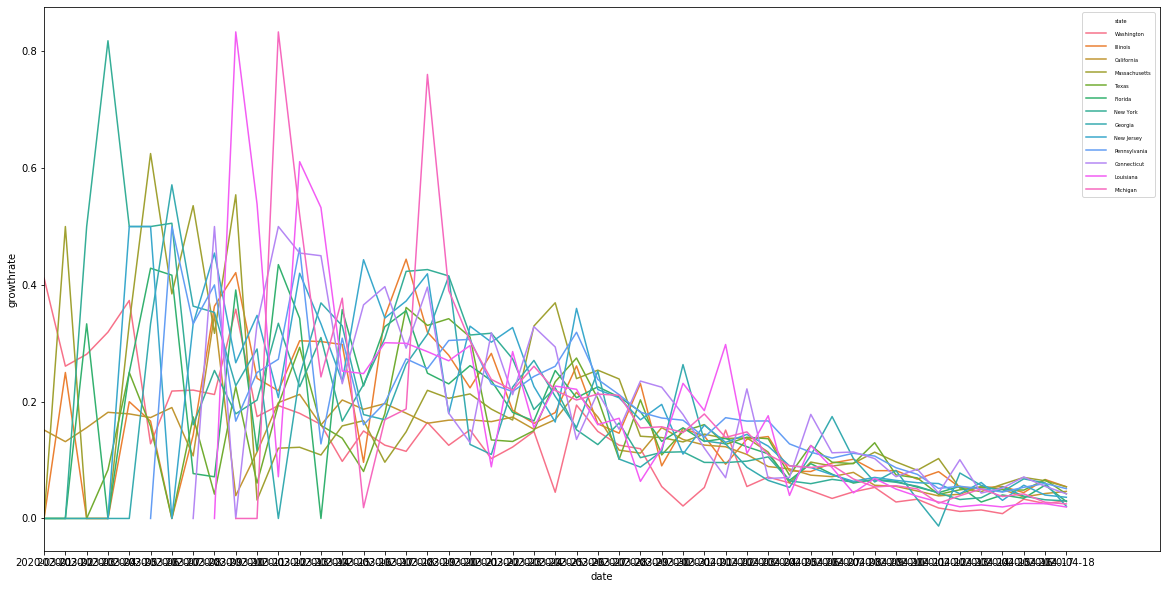

In [4]:
# is there a difference in growth rate by state?
import seaborn as sns
array1 = ['New York', 'New Jersey', 'Michigan', 'Massachusetts', 'California', 
         'Pennsylvania', 'Louisiana', 'Illinois', 'Florida', 'Texas', 'Georgia',
          'Connecticut', 'Washington']
df2 = df.loc[df['state'].isin(array1)]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="date", y="growthrate", hue="state", data=df2)
ax.set_xlim(40,)
plt.setp(ax.get_legend().get_texts(), fontsize='5')
plt.show()

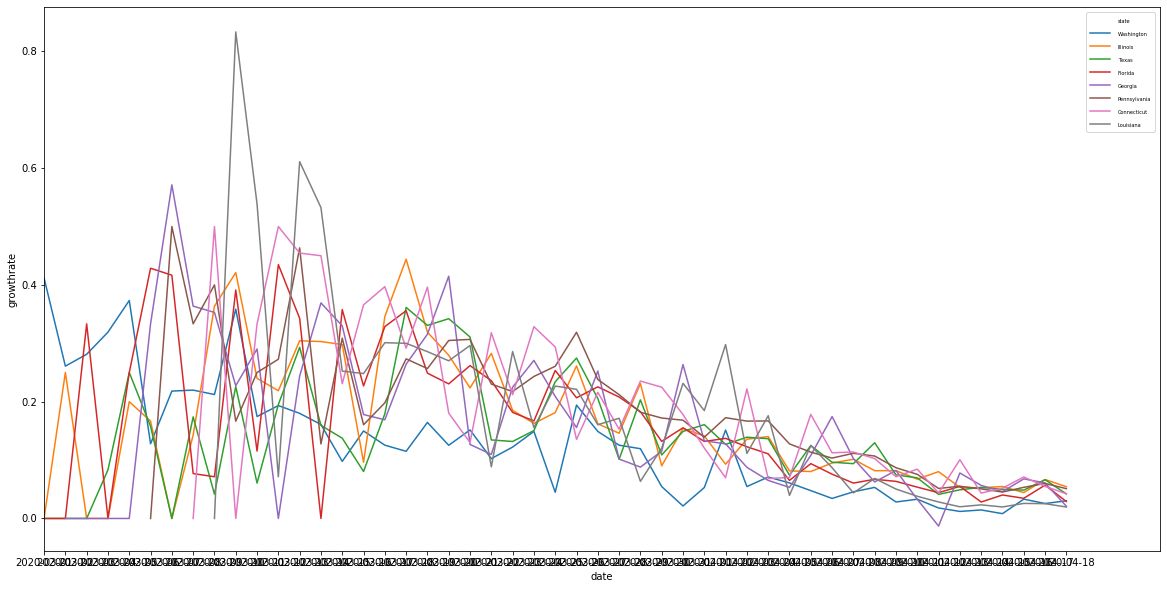

In [5]:
array2 =['Pennsylvania', 'Louisiana', 'Illinois', 'Florida', 'Texas', 'Georgia',
        'Connecticut', 'Washington']
df2 = df.loc[df['state'].isin(array2)]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="date", y="growthrate", hue="state", data=df2)
ax.set_xlim(40,)
plt.setp(ax.get_legend().get_texts(), fontsize='5')
plt.show()

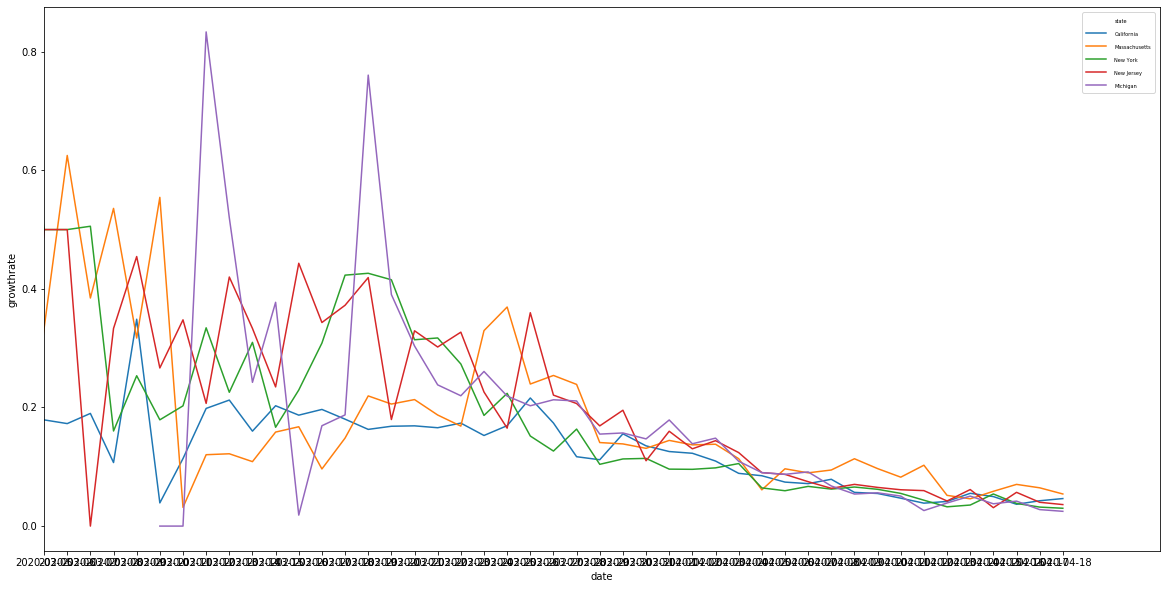

In [6]:
array3 = ['New York', 'New Jersey', 'Michigan', 'Massachusetts', 'California']
df2 = df.loc[df['state'].isin(array3)]
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="date", y="growthrate", hue="state", data=df2)
ax.set_xlim(40,)
plt.setp(ax.get_legend().get_texts(), fontsize='5')
plt.show()

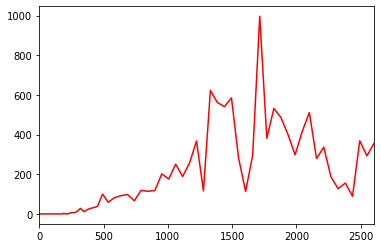

In [7]:

df[df.state== 'Washington'].newcases.plot(kind = "line", color='r')

In [8]:
df

,date,state,fips,cases,deaths,newcases,growthrate
0,2020-01-21,Washington,53,1,0,0,0.000000
1,2020-01-22,Washington,53,1,0,0,0.000000
2,2020-01-23,Washington,53,1,0,0,0.000000
3,2020-01-24,Illinois,17,1,0,0,0.000000
4,2020-01-24,Washington,53,1,0,0,0.000000
...,...,...,...,...,...,...,...
2604,2020-04-18,Virginia,51,8053,258,562,0.069788
2605,2020-04-18,Washington,53,11802,629,357,0.030249
2606,2020-04-18,West Virginia,54,825,18,49,0.059394
2607,2020-04-18,Wisconsin,55,4199,212,154,0.036675


In [35]:
# plt.subplots(10, 5)
# for i in df.state:
#     plt.plot(df[df.state== i].date, df[df.state== i].newcases)
#     plt.xlabel('Date', size =15)
#     plt.ylabel('New case', size = 15)
#     plt.title(i, size =20)
#     plt.show()

In [10]:
mobility_df= pd.read_csv('US_Mobility_Report_byState.csv')

mobility_df = mobility_df.rename(columns={'sub_region_1': 'state'})
mobility_df

,country_region_code,country_region,state,sub_region_2,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Unnamed: 11,Unnamed: 12
0,US,United States,Alabama,NaN,2/15/20,5,2,39,7,2,-1,NaN,NaN
1,US,United States,Alabama,NaN,2/16/20,0,-2,-7,3,-1,1,NaN,NaN
2,US,United States,Alabama,NaN,2/17/20,3,0,17,7,-17,4,NaN,NaN
3,US,United States,Alabama,NaN,2/18/20,-4,-3,-11,-1,1,2,NaN,NaN
4,US,United States,Alabama,NaN,2/19/20,4,1,6,4,1,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,US,United States,Wyoming,NaN,4/7/20,-32,-5,15,-13,-37,14,NaN,NaN
2903,US,United States,Wyoming,NaN,4/8/20,-32,-4,26,-12,-38,14,NaN,NaN
2904,US,United States,Wyoming,NaN,4/9/20,-32,-5,33,-13,-38,14,NaN,NaN
2905,US,United States,Wyoming,NaN,4/10/20,-33,1,44,-10,-41,16,NaN,NaN


In [11]:

type(mobility_df.date[0])

str

In [12]:
from datetime import datetime
df['date']= pd.to_datetime(df['date'])
mobility_df['date']= pd.to_datetime(mobility_df['date'])

In [13]:
new_df = pd.merge(df, mobility_df,  how='right', on = ['date', 'state'])
new_df = new_df.drop(['country_region_code', 'country_region', 'sub_region_2', 'Unnamed: 11', 'Unnamed: 12'], axis=1)
new_df 

,date,state,fips,cases,deaths,newcases,growthrate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,2020-02-15,Arizona,4.0,1.0,0.0,0.0,0.0,3,2,13,3,-1,0
1,2020-02-15,California,6.0,7.0,0.0,0.0,0.0,1,1,19,1,-1,0
2,2020-02-15,Illinois,17.0,2.0,0.0,0.0,0.0,4,3,10,3,3,-1
3,2020-02-15,Massachusetts,25.0,1.0,0.0,0.0,0.0,2,-4,0,3,-2,0
4,2020-02-15,Texas,48.0,2.0,0.0,0.0,0.0,3,3,12,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2902,2020-03-06,Wyoming,NaN,NaN,NaN,NaN,NaN,8,12,32,16,3,-1
2903,2020-03-07,Wyoming,NaN,NaN,NaN,NaN,NaN,13,15,39,21,4,-3
2904,2020-03-08,Wyoming,NaN,NaN,NaN,NaN,NaN,9,10,3,4,2,0
2905,2020-03-09,Wyoming,NaN,NaN,NaN,NaN,NaN,9,16,19,8,4,-1


In [14]:
approval_df= pd.read_csv('trumpSupportRate2017Gallup.csv')


In [15]:
new_df2 = pd.merge(new_df, approval_df, on = 'state')


In [36]:
# import scipy.stats as stats
# import statsmodels.formula.api as smf
# for i in new_df2.state:
#     m = smf.ols(formula ='newcases ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline+ SupportRate',
#            data = new_df2[new_df2.state==i])
#     r = m.fit()
#     print(i)
#     print(r.summary())

In [ ]:
len(list(set(new_df2.state)))

In [ ]:
import scipy.stats as stats
import statsmodels.formula.api as smf
new_df3 = new_df2.groupby('state').mean()
new_df3['STATE'] = new_df3.index
retail_pvalue=[]
grocery_pvalue=[]
park_pvalue=[]
transit_pvalue=[]
workplace_pvalue=[]
rresidential_pvalue=[]
state =[]
for i in list(set(new_df2.state)):
    m = smf.ols(formula ='growthrate ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline+ SupportRate',
           data = new_df2[new_df2.state==i])
    r = m.fit()
    state.append(i)
    retail_pvalue.append(r.pvalues[2])
    grocery_pvalue.append(r.pvalues[3])
    park_pvalue.append(r.pvalues[4])
    transit_pvalue.append(r.pvalues[5])
    workplace_pvalue.append(r.pvalues[6])
    rresidential_pvalue.append(r.pvalues[7])
#     new_df3.loc[new_df3['state'] == i , 'grocery_pvalue']=r.pvalues[3]
#     new_df3.loc[new_df3['state'] == i , 'park_pvalue']=r.pvalues[4]
#     new_df3.loc[new_df3['state'] == i , 'transit_pvalue']=r.pvalues[5]
#     new_df3.loc[new_df3['state'] == i , 'workplace_pvalue']=r.pvalues[6]
#     new_df3.loc[new_df3['state'] == i , 'rresidential_pvalue']=r.pvalues[7]
    print(i)
    print(r.summary())
    print('###############################################################################################')
print(state, retail_pvalue)

In [18]:
new_df4 =pd.DataFrame({'state':state, 'retail_pvalue':retail_pvalue, 'grocery_pvalue':grocery_pvalue,
                       'park_pvalue': park_pvalue,'transit_pvalue':transit_pvalue, 'workplace_pvalue':workplace_pvalue,
                      'rresidential_pvalue':rresidential_pvalue})
new_df4

,state,retail_pvalue,grocery_pvalue,park_pvalue,transit_pvalue,workplace_pvalue,rresidential_pvalue
0,Texas,0.004078,0.121335,0.885405,0.168936,0.207506,0.002434
1,West Virginia,0.080458,0.064449,0.000996,0.867949,0.138050,0.275068
2,Connecticut,0.072992,0.382221,0.593240,0.495124,0.708214,0.002531
3,Rhode Island,0.770376,0.810101,0.031551,0.105241,0.449350,0.571921
4,Alabama,0.650093,0.015585,0.005693,0.505338,0.249878,0.372035
5,Kentucky,0.417205,0.115709,0.102139,0.492513,0.500247,0.013943
6,New Jersey,0.370339,0.421901,0.094343,0.125446,0.245655,0.008468
7,North Carolina,0.275339,0.260992,0.347812,0.925445,0.954906,0.037392
8,South Dakota,0.553661,0.830389,0.289577,0.690172,0.733923,0.128634
9,Wyoming,0.016906,0.173091,0.421232,0.156576,0.372214,0.471355


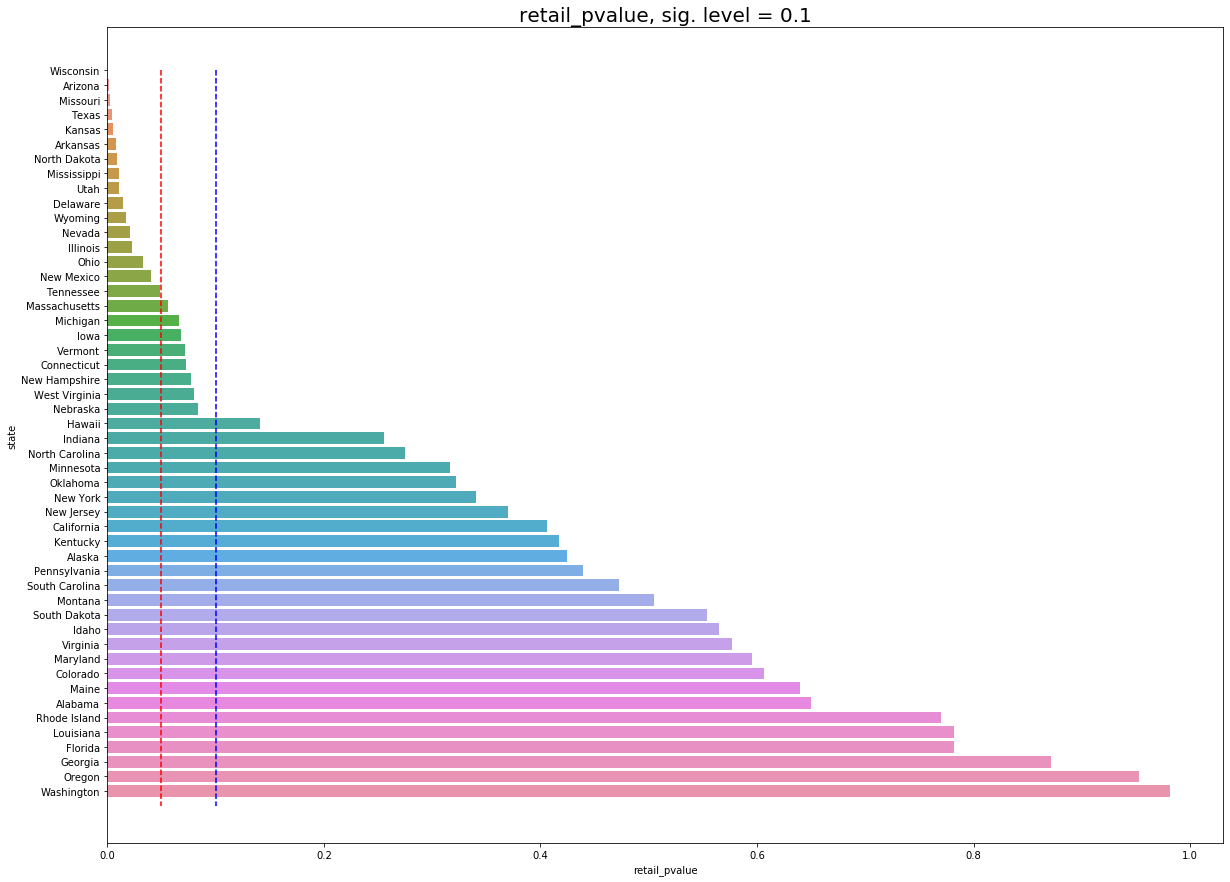

In [19]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="retail_pvalue",data=new_df4.sort_values(['retail_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.vlines(x = 0.05, ymin = 0, ymax = 50, color = 'red', linestyles = 'dashed', label = '0.05')
plt.title('retail_pvalue, sig. level = 0.1', size =20)

plt.show()

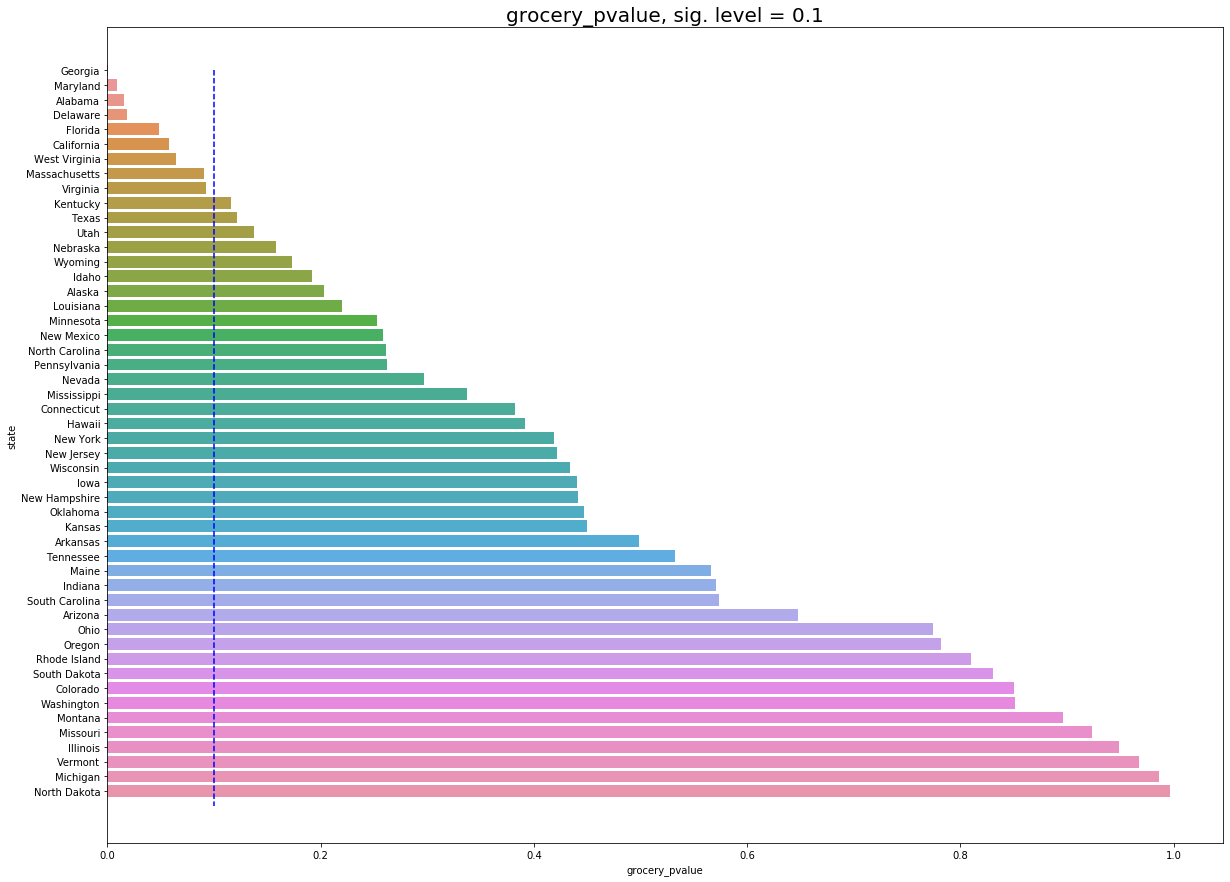

In [20]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="grocery_pvalue",data=new_df4.sort_values(['grocery_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('grocery_pvalue, sig. level = 0.1', size =20)
plt.show()

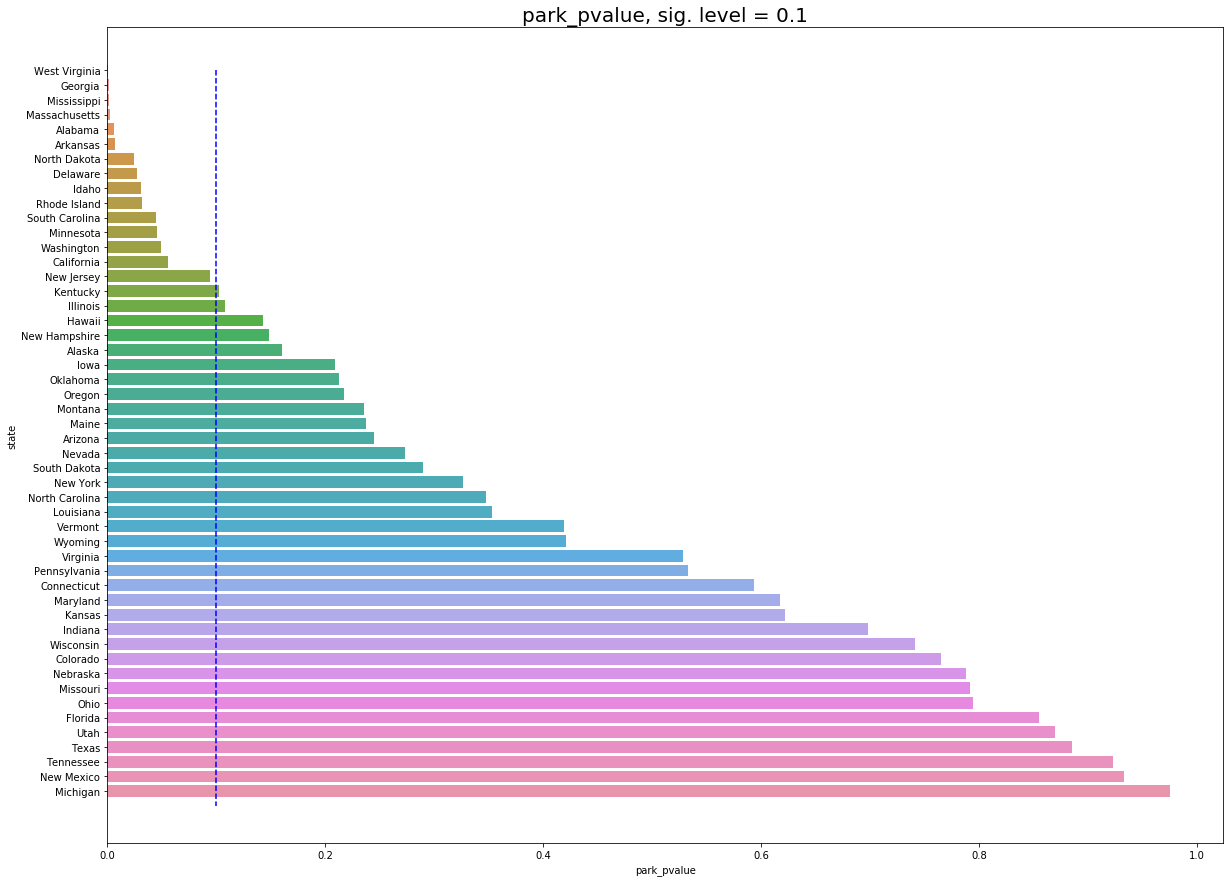

In [21]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="park_pvalue",data=new_df4.sort_values(['park_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('park_pvalue, sig. level = 0.1', size =20)
plt.show()

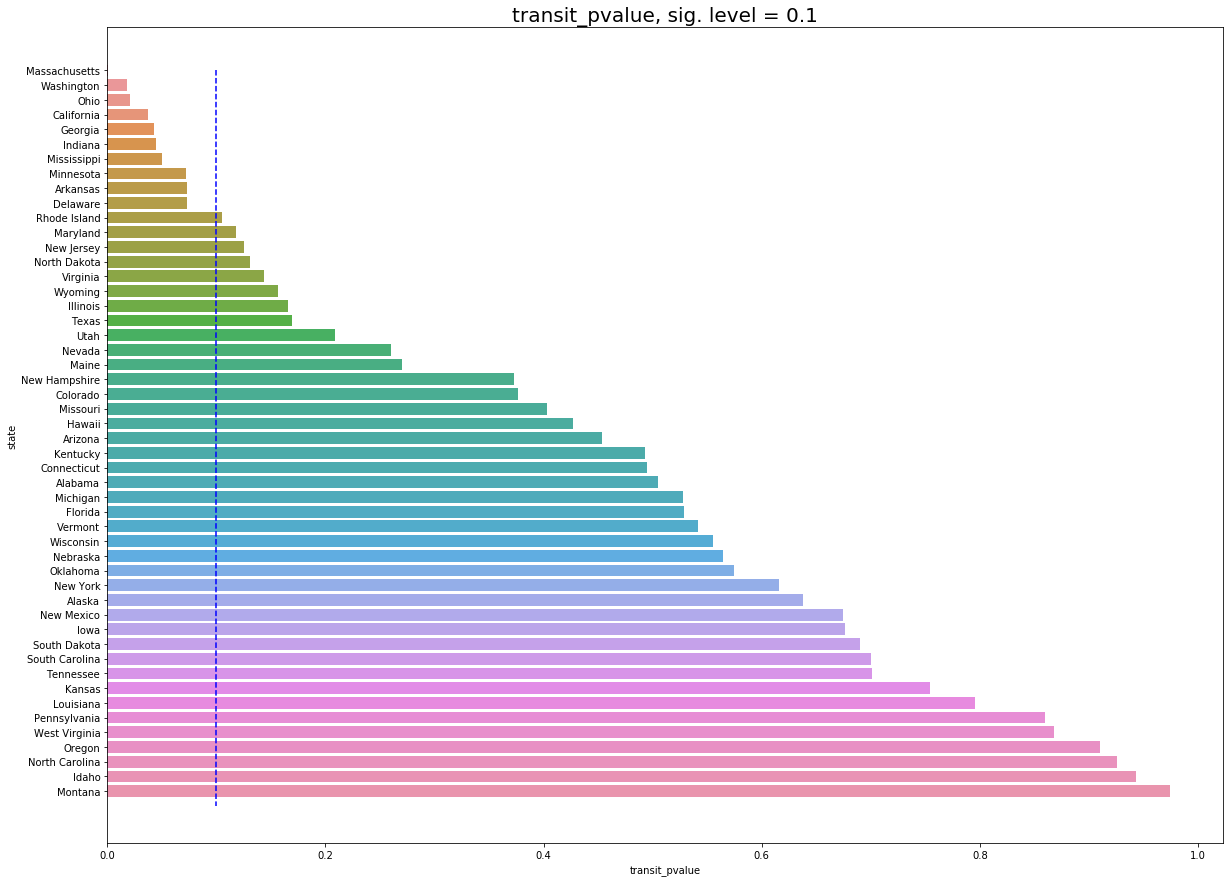

In [22]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="transit_pvalue",data=new_df4.sort_values(['transit_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('transit_pvalue, sig. level = 0.1', size =20)
plt.show()

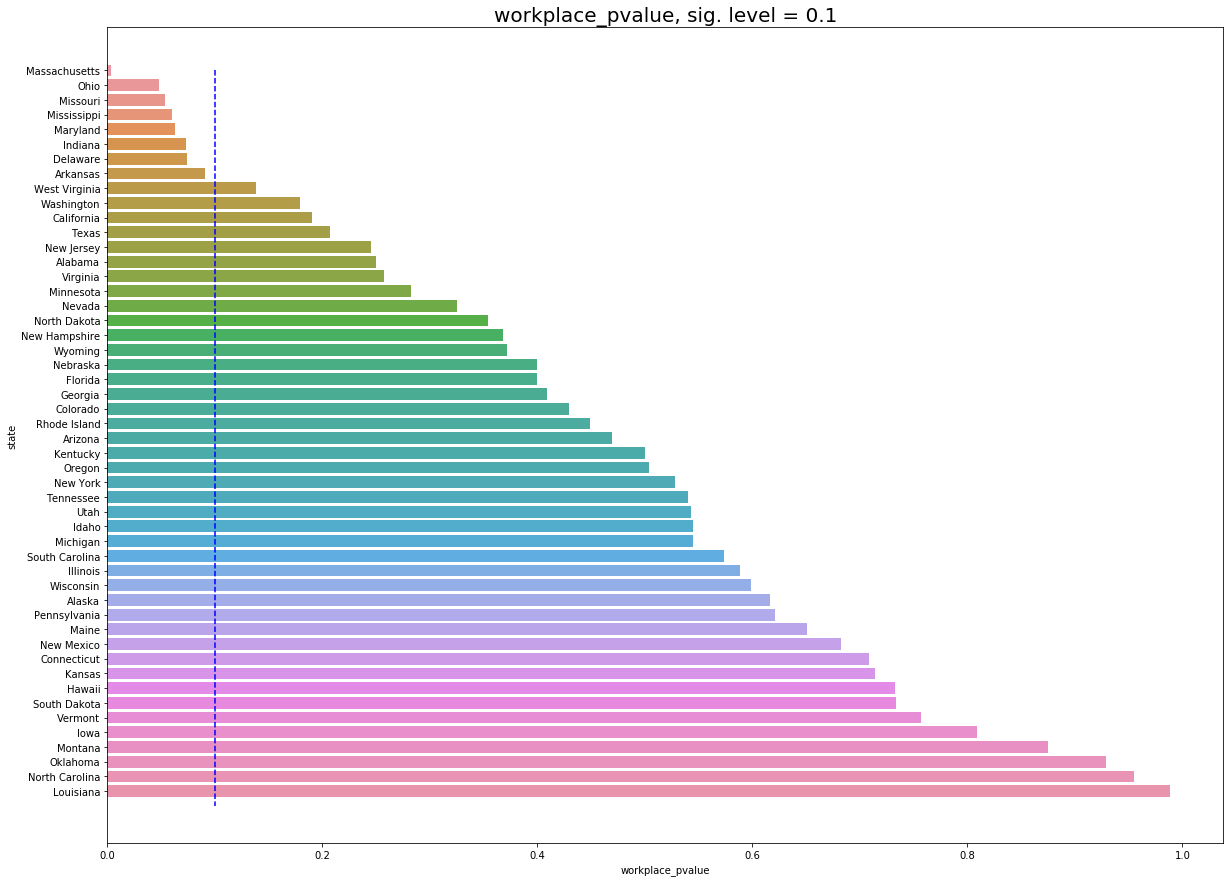

In [23]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="workplace_pvalue",data=new_df4.sort_values(['workplace_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('workplace_pvalue, sig. level = 0.1', size =20)
plt.show()

In [24]:
# for i in array1:
#     m = smf.ols(formula ='newcases ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline',
#            data = new_df2[new_df2.state==i])
#     r = m.fit()
#     print(i)
#     print(r.summary())
#     print('###############################################################################################')

In [25]:
# for i in array1:
#     m = smf.ols(formula ='growthrate ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline',
#            data = new_df2[new_df2.state==i])
#     r = m.fit()
#     print(i)
#     print(r.summary())
#     print('###############################################################################################')

In [26]:
new_df3 = new_df2.groupby('state').mean()
new_df3

,fips,cases,deaths,newcases,growthrate,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,SupportRate
state,,,,,,,,,,,,
Alabama,1.0,977.466667,22.100000,108.533333,0.179411,-11.245614,3.473684,17.122807,-6.122807,-15.000000,6.087719,53.0
Alaska,2.0,96.935484,1.580645,8.193548,0.144265,-12.578947,-0.842105,14.491228,-16.543860,-16.929825,6.824561,50.0
Arizona,4.0,582.508772,15.122807,59.508772,0.120938,-12.982456,-1.122807,-1.543860,-14.280702,-18.929825,6.842105,41.0
Arkansas,5.0,443.343750,6.937500,38.343750,0.168924,-8.070175,3.438596,32.929825,-8.052632,-13.614035,5.140351,50.0
California,6.0,4119.982456,98.771930,393.228070,0.125691,-19.070175,-3.912281,-11.771930,-26.508772,-22.245614,10.035088,29.0
Colorado,8.0,1980.105263,57.131579,181.342105,0.174551,-18.140351,-2.000000,4.649123,-24.877193,-21.280702,8.771930,37.0
Connecticut,9.0,2661.514286,88.742857,328.828571,0.221115,-17.210526,-2.719298,21.719298,-22.491228,-20.824561,9.140351,31.0
Delaware,10.0,350.156250,7.312500,46.187500,0.182703,-13.807018,-5.175439,18.473684,-19.140351,-18.508772,7.771930,36.0
Florida,12.0,4388.047619,81.333333,451.809524,0.185776,-16.754386,-3.666667,-12.508772,-23.070175,-18.842105,7.631579,41.0


In [27]:
m = smf.ols(formula ='growthrate ~ SupportRate+retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline',
           data = new_df3)
r = m.fit()
r.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             growthrate   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.9432
Date:                Wed, 22 Apr 2020   Prob (F-statistic):              0.484
Time:                        15:54:08   Log-Likelihood:                 104.29
No. Observations:                  50   AIC:                            -192.6
Df Residuals:                      42   BIC:                            -177.3
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
Intercept                                             -0.0020      0.084     -0.024      0.981      -0.172       0.168
SupportRate                                            0.0015      0.001      1.484      0.145      -0.001       0.003
retail_and_recreation_percent_change_from_baseline     0.0035      0.003      1.020      0.314      -0.003       0.010
grocery_and_pharmacy_percent_change_from_baseline     -0.0005      0.002     -0.279      0.782      -0.004       0.003
parks_percent_change_from_baseline                     0.0002      0.000      0.637      0.527      -0.000       0.001
transit_stations_percent_change_from_baseline      -5.243e-07      0.002     -0.000      1.000      -0.003       0.003
workplaces_percent_change_from_baseline               -0.0051      0.004     -1.448      0.155      -0.012       0.002
residential_percent_change_from_baseline               0.0076      0.012      0.660      0.513      -0.016       0.031
==============================================================================
Omnibus:                        1.960   Durbin-Watson:                   1.954
Prob(Omnibus):                  0.375   Jarque-Bera (JB):                1.641
Skew:                          -0.441   Prob(JB):                        0.440
Kurtosis:                       2.902   Cond. No.                         991.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
pd.DataFrame.corr(new_df3, method='pearson', min_periods=1).SupportRate 

fips                                                  0.114914
cases                                                -0.294286
deaths                                               -0.278370
newcases                                             -0.305476
growthrate                                           -0.038322
retail_and_recreation_percent_change_from_baseline    0.716579
grocery_and_pharmacy_percent_change_from_baseline     0.674956
parks_percent_change_from_baseline                    0.268791
transit_stations_percent_change_from_baseline         0.809695
workplaces_percent_change_from_baseline               0.789404
residential_percent_change_from_baseline             -0.803745
SupportRate                                           1.000000
Name: SupportRate, dtype: float64

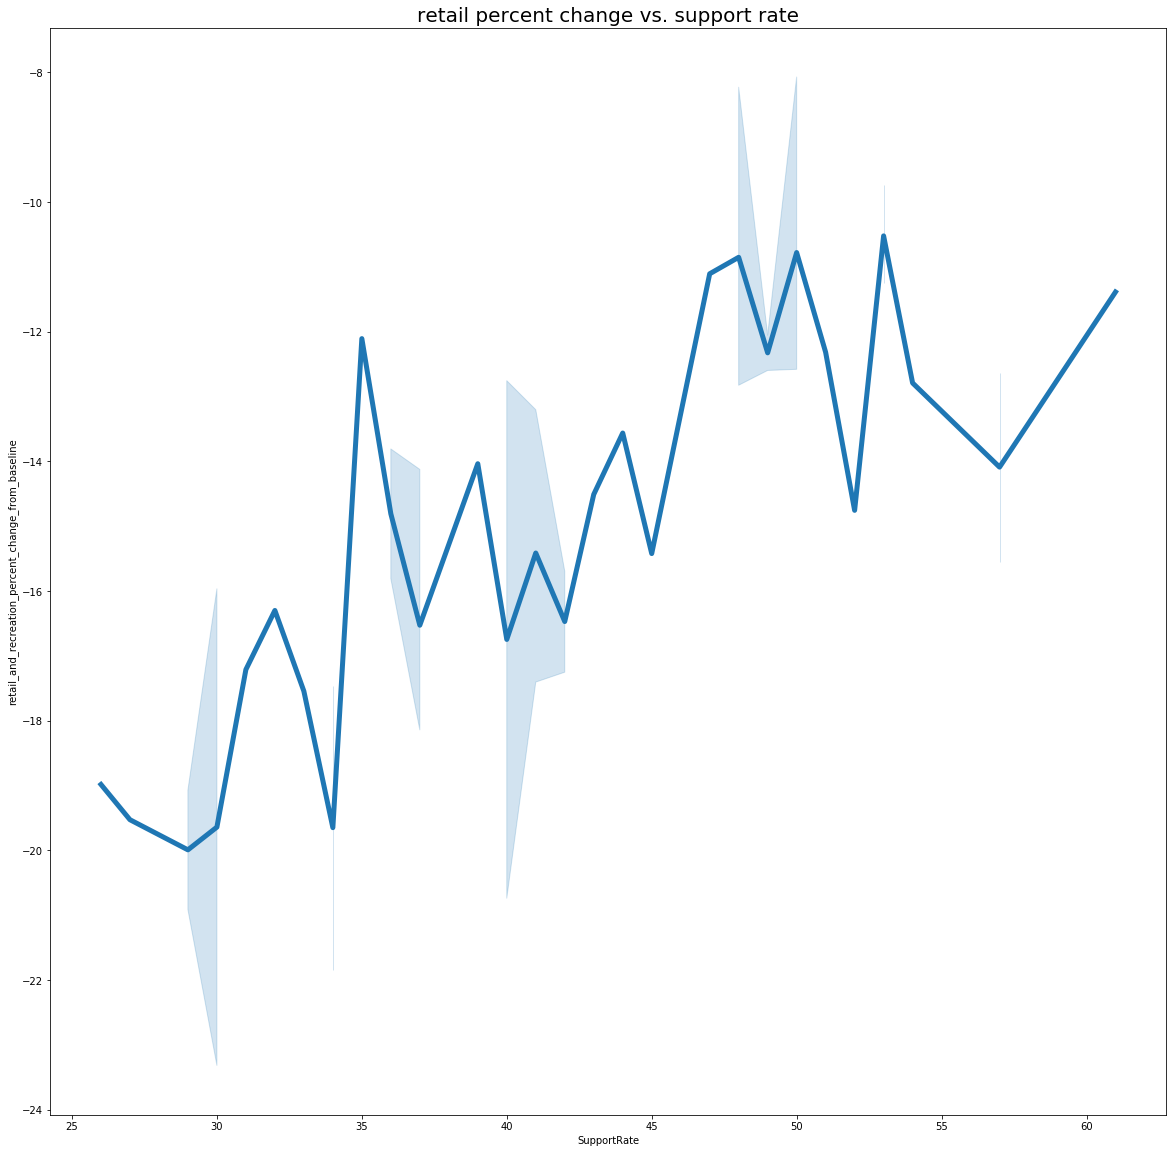

In [44]:
plt.figure(figsize=(20,20))
ax = sns.lineplot(y="retail_and_recreation_percent_change_from_baseline", lw=5, x="SupportRate", data=new_df3)
plt.title('retail percent change vs. support rate', size =20)
plt.show()

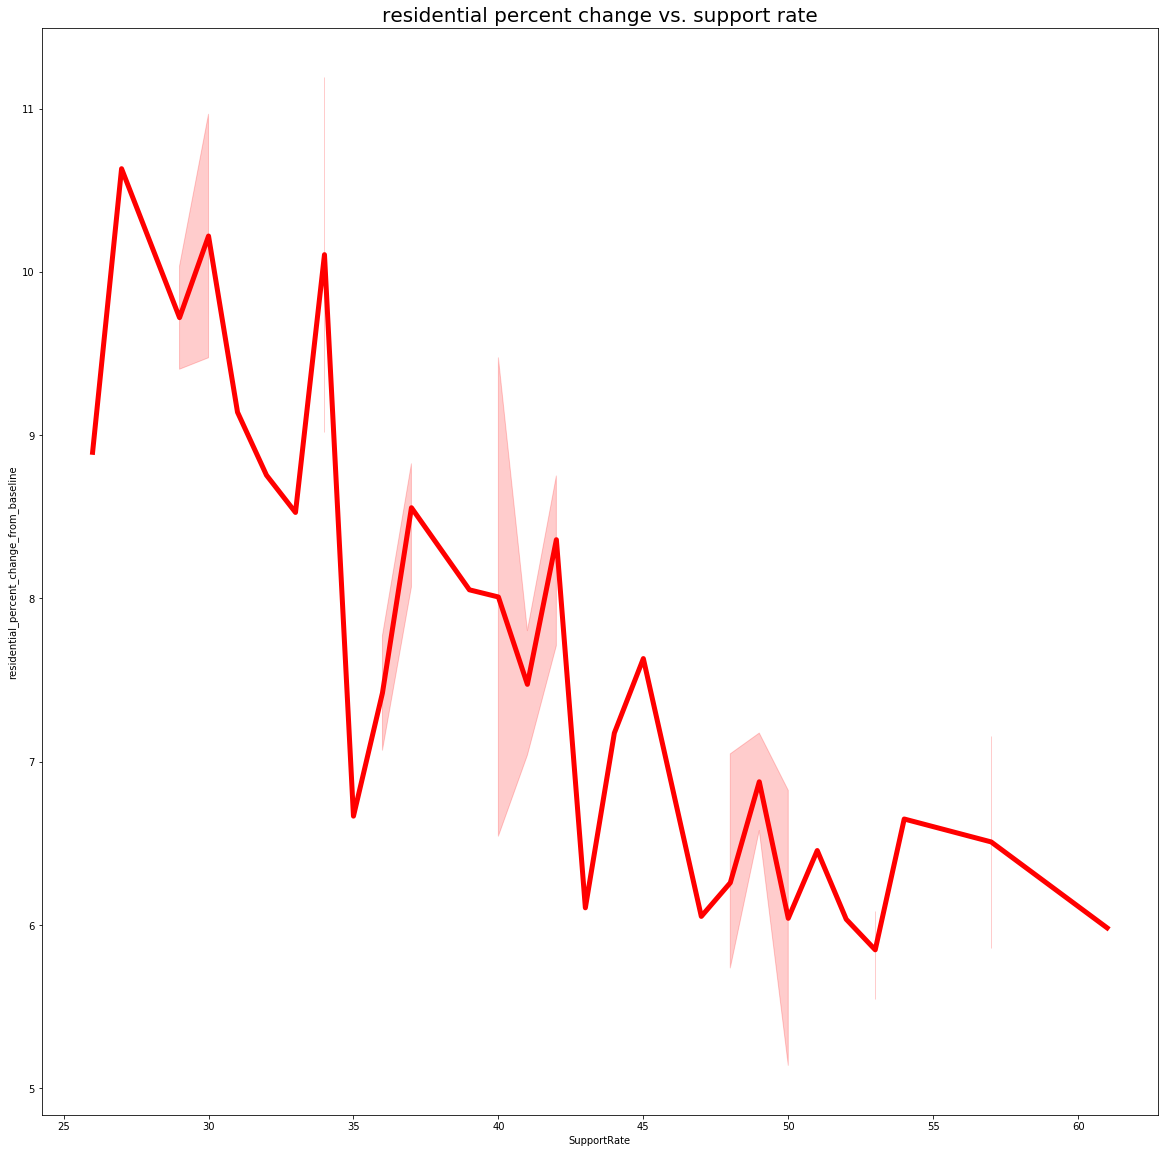

In [43]:
plt.figure(figsize=(20,20))
ax = sns.lineplot(y="residential_percent_change_from_baseline", x="SupportRate", lw=5, color = 'r', data=new_df3)
plt.title('residential percent change vs. support rate', size =20)
plt.show()

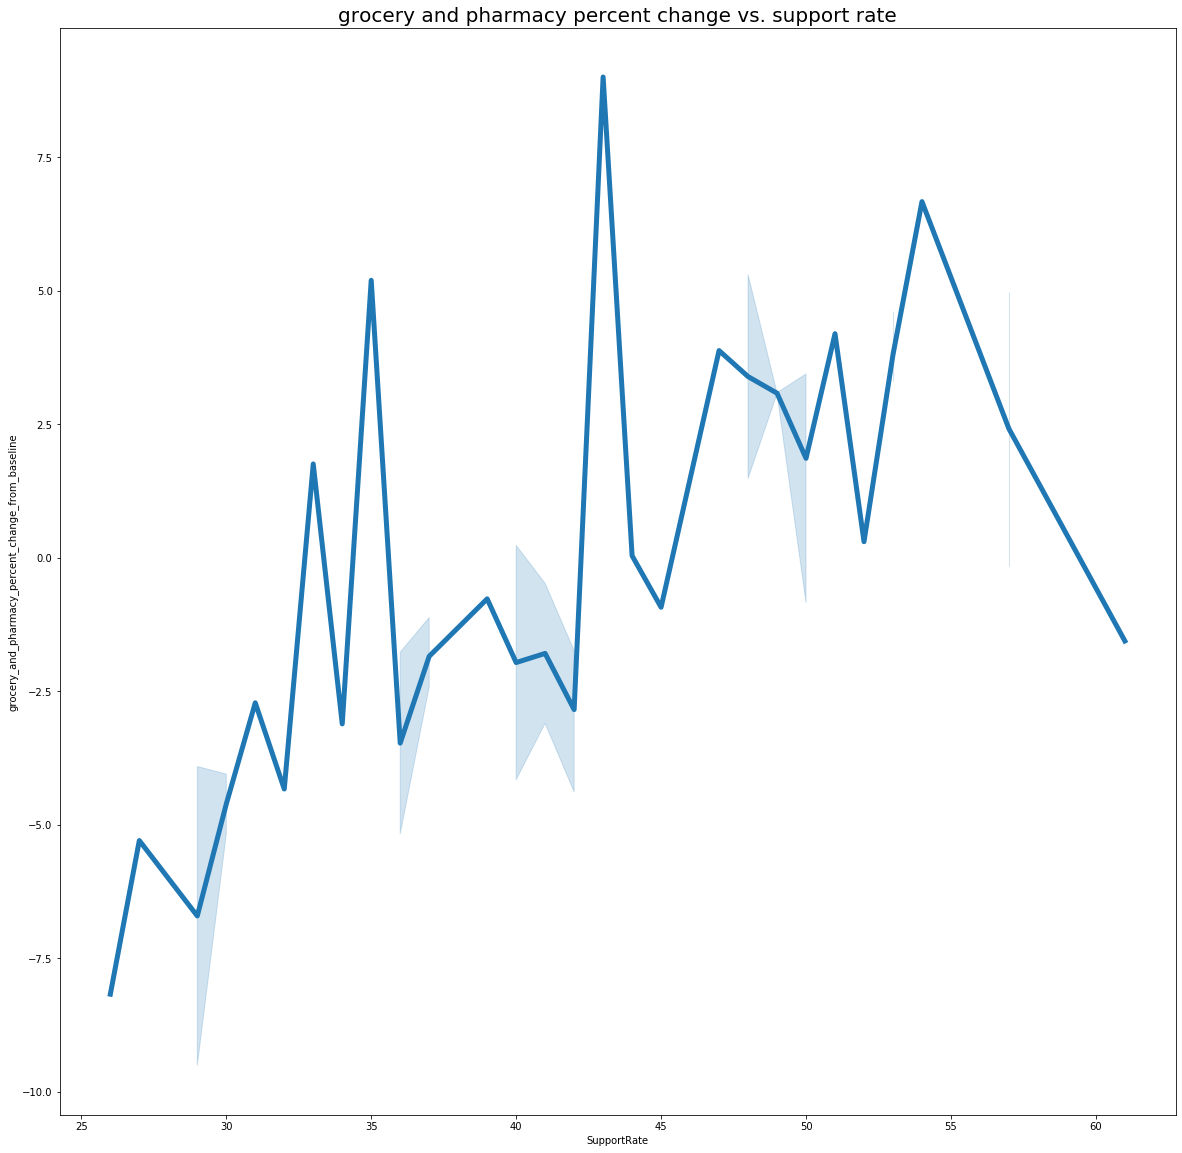

In [42]:
plt.figure(figsize=(20,20))
ax = sns.lineplot(y="grocery_and_pharmacy_percent_change_from_baseline", x="SupportRate", lw=5, data=new_df3)
plt.title('grocery and pharmacy percent change vs. support rate', size =20)
plt.show()

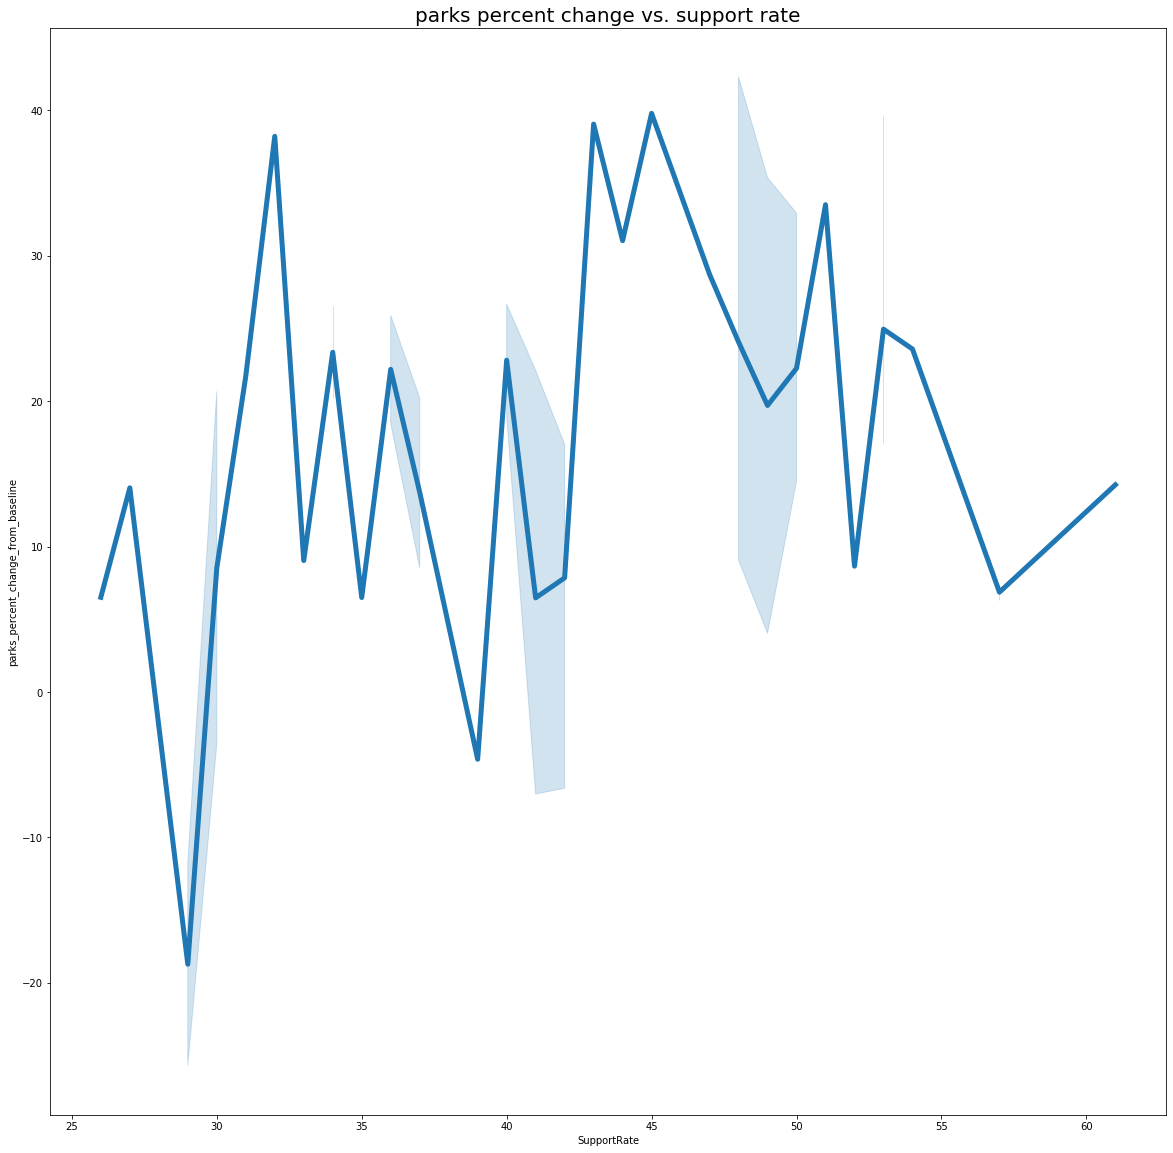

In [41]:
plt.figure(figsize=(20,20))
ax = sns.lineplot(y="parks_percent_change_from_baseline", x="SupportRate", lw=5, data=new_df3)
plt.title('parks percent change vs. support rate', size =20)
plt.show()

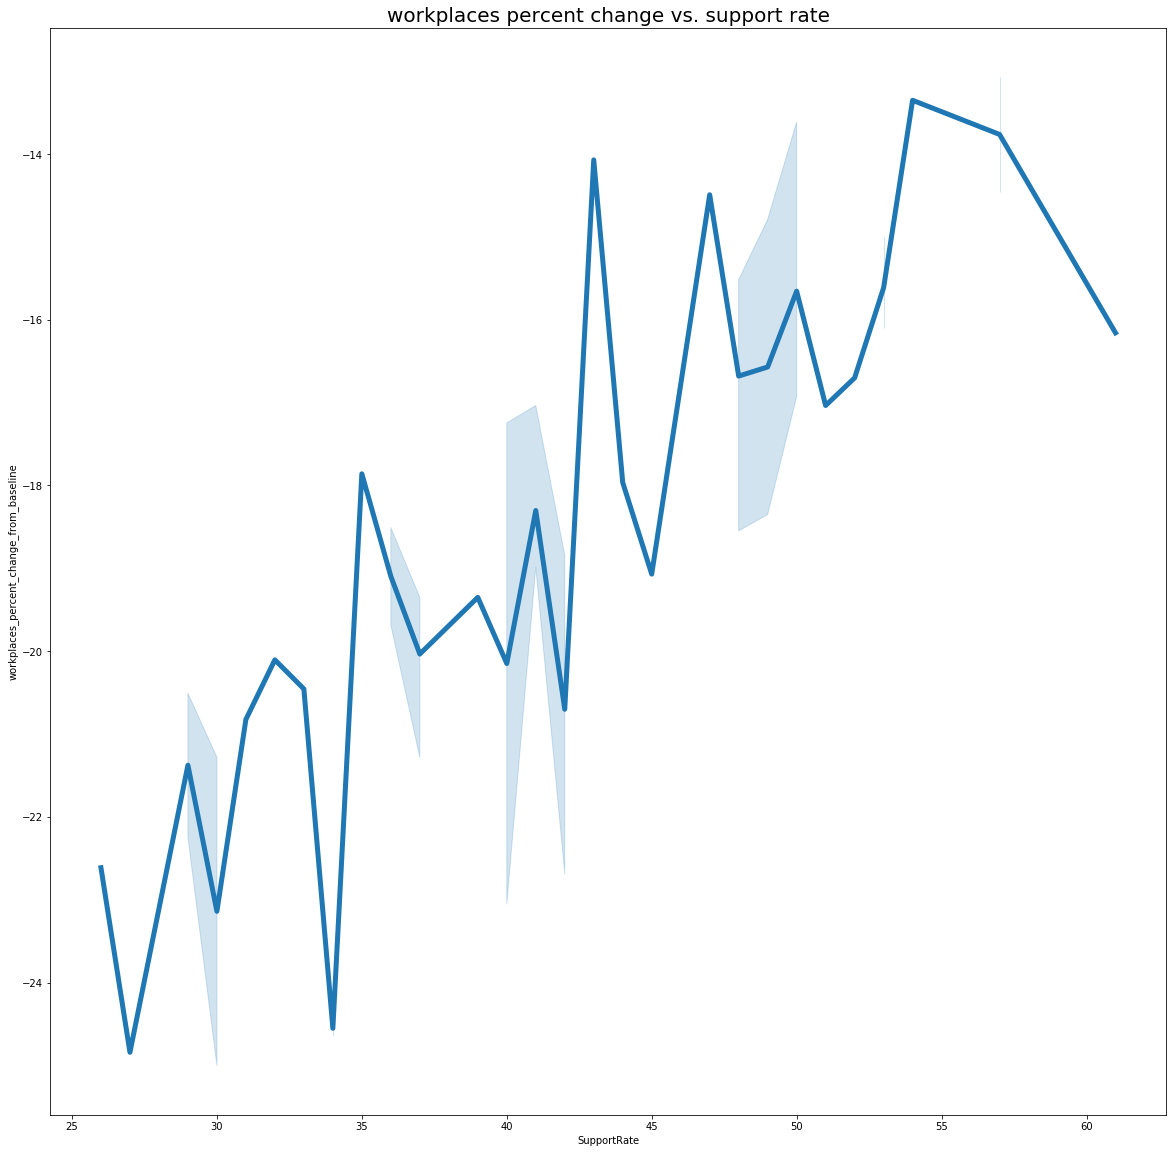

In [40]:
plt.figure(figsize=(20,20))
ax = sns.lineplot(y="workplaces_percent_change_from_baseline", x="SupportRate", lw=5, data=new_df3)
plt.title('workplaces percent change vs. support rate', size =20)
plt.show()

# Redudant codes below
# IGNORE BELOW
##################################################################################################
##################################################################################################

In [ ]:
new_df4 = new_df2.groupby('state').mean()
new_df4['STATE'] = new_df3.index
retail_pvalue2=[]
grocery_pvalue2=[]
park_pvalue2=[]
transit_pvalue2=[]
workplace_pvalue2=[]
rresidential_pvalue2=[]
state =[]
for i in list(set(new_df2.state)):
    m = smf.ols(formula ='newcases ~ retail_and_recreation_percent_change_from_baseline + grocery_and_pharmacy_percent_change_from_baseline + parks_percent_change_from_baseline+transit_stations_percent_change_from_baseline+ workplaces_percent_change_from_baseline+residential_percent_change_from_baseline+ SupportRate',
           data = new_df2[new_df2.state==i])
    r = m.fit()
    state.append(i)
    retail_pvalue2.append(r.pvalues[2])
    grocery_pvalue2.append(r.pvalues[3])
    park_pvalue2.append(r.pvalues[4])
    transit_pvalue2.append(r.pvalues[5])
    workplace_pvalue2.append(r.pvalues[6])
    rresidential_pvalue2.append(r.pvalues[7])
#     new_df3.loc[new_df3['state'] == i , 'grocery_pvalue']=r.pvalues[3]
#     new_df3.loc[new_df3['state'] == i , 'park_pvalue']=r.pvalues[4]
#     new_df3.loc[new_df3['state'] == i , 'transit_pvalue']=r.pvalues[5]
#     new_df3.loc[new_df3['state'] == i , 'workplace_pvalue']=r.pvalues[6]
#     new_df3.loc[new_df3['state'] == i , 'rresidential_pvalue']=r.pvalues[7]
    print(i)
    print(r.summary())
    print('###############################################################################################')
print(state, retail_pvalue)

In [ ]:
new_df5 =pd.DataFrame({'state':state, 'retail_pvalue':retail_pvalue, 'grocery_pvalue':grocery_pvalue,
                       'park_pvalue': park_pvalue,'transit_pvalue':transit_pvalue, 'workplace_pvalue':workplace_pvalue,
                      'rresidential_pvalue':rresidential_pvalue})
new_df5

In [ ]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="retail_pvalue",data=new_df5.sort_values(['retail_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('retail_pvalue, sig. level = 0.1', size =20)
plt.show()

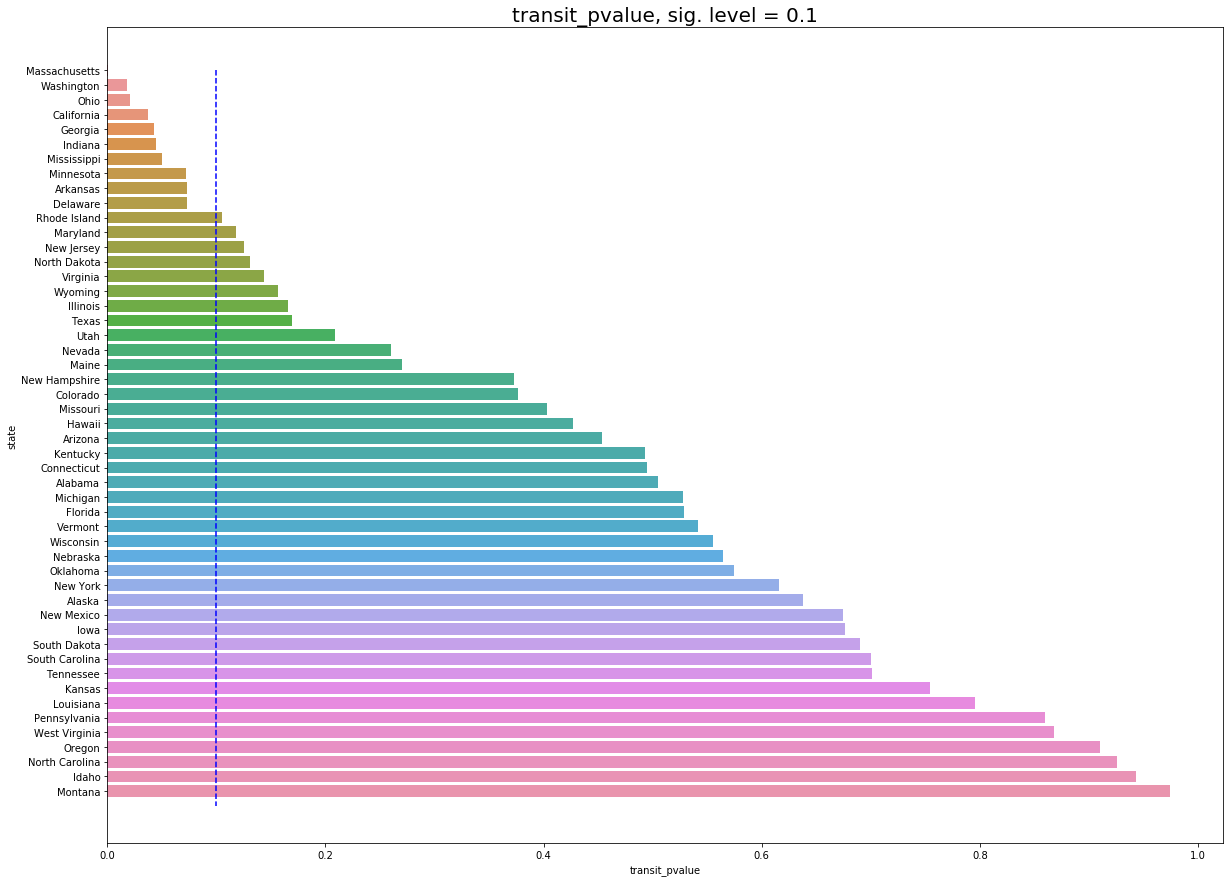

In [228]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="transit_pvalue",data=new_df5.sort_values(['transit_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('transit_pvalue, sig. level = 0.1', size =20)
plt.show()

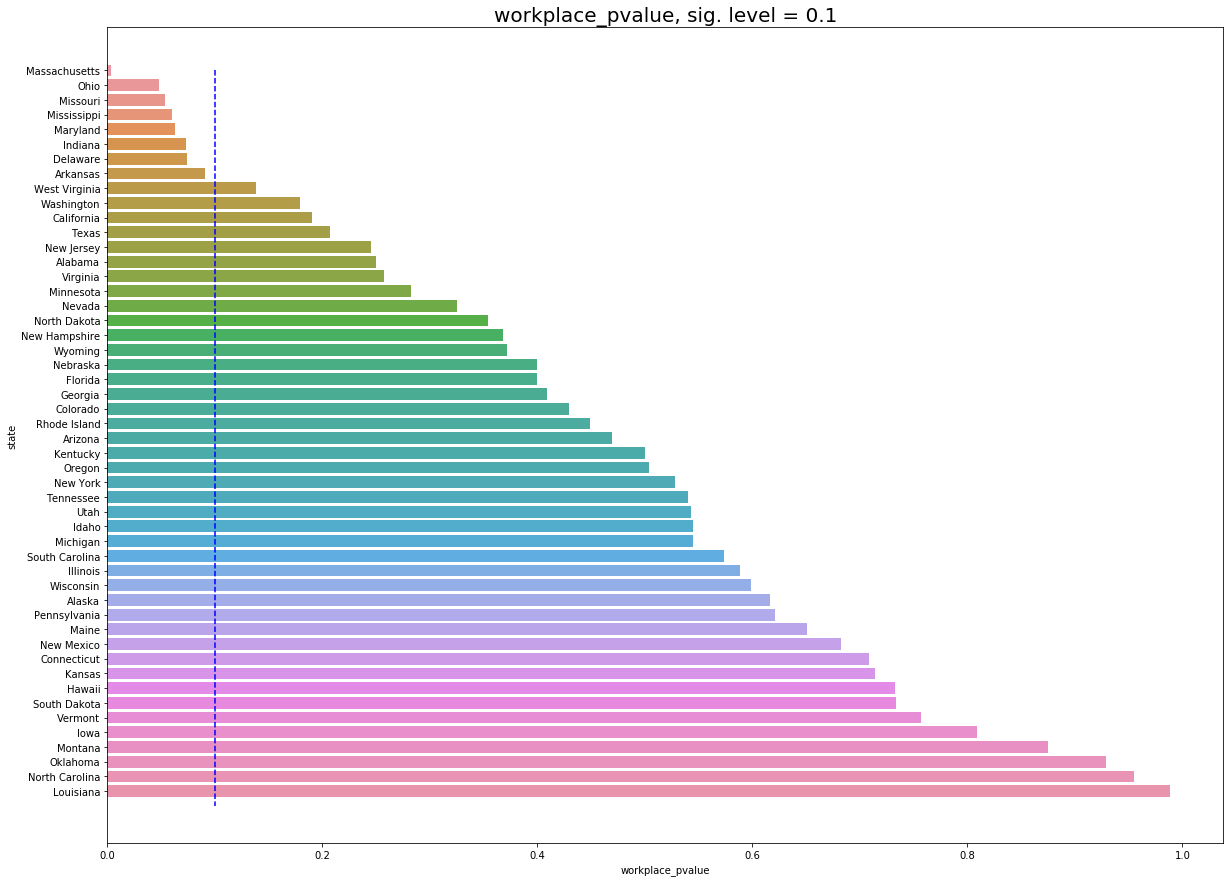

In [230]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="workplace_pvalue",data=new_df5.sort_values(['workplace_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('workplace_pvalue, sig. level = 0.1', size =20)
plt.show()

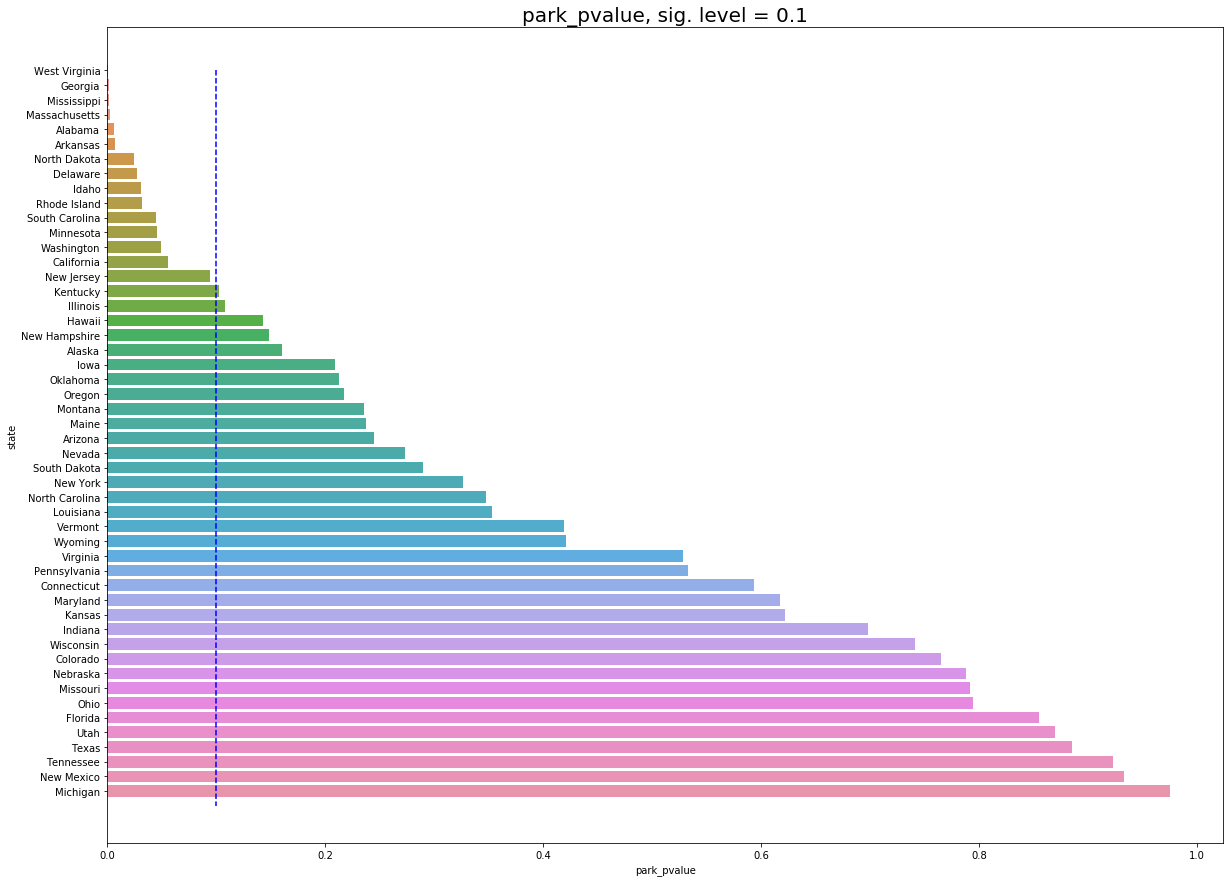

In [229]:
plt.figure(figsize=(20,15))
ax = sns.barplot(y="state", x="park_pvalue",data=new_df5.sort_values(['park_pvalue']))
plt.vlines(x = 0.1, ymin = 0, ymax = 50, color = 'blue', linestyles = 'dashed', label = '0.1')
plt.title('park_pvalue, sig. level = 0.1', size =20)
plt.show()

# TRUMP_GEOSPATIAL ANALYSIS

In [ ]:

import json
from datetime import datetime
from twitterscraper import query_tweets

tweets = query_tweets('trump', begindate = '2014-01-01', enddate = '2014-07-05', limit = 1000, )
# df1 = pd.DataFrame(t.dict for t in tweets)
# export_csv = df1.to_csv ('oz_comic_con_2014.csv', index = None, header=True)



jsonfile = open("tweets.json","w")
list_of_tweets = query_tweets("Trump", limit=None, begindate=datetime.datetime(2020, 3, 21), 
                                  enddate=datetime.datetime(2020, 4, 9), lang='english', near:Melbourne)
list_of_json = [] # create empty list to save multiple tweets which is type of json(dictionary)
for tweets in list_of_tweets: # for looping
    tweets.timestamp = datetime.strftime(tweets.timestamp, '%Y-%m-%d %H:%M:%S')
    list_of_json.append(vars(tweets))

# if __name__ == '__main__':
#     list_of_tweets = query_tweets("Trump OR Clinton", limit=None, begindate=datetime.date(2020, 3, 21), 
#                                   enddate=datetime.date(2020, 4, 9), poolsize=20, lang='english')
#     #Or save the retrieved tweets to file:
#     file = open(“output.txt”,”w”)
#     for tweet in list_of_tweets:
#         file.write(tweet.encode('utf-8'))
#     file.close()
# tweets = query_tweets('oz comic con', begindate = '2014-01-01', enddate = '2014-07-05', limit = limit)
# df1 = pd.DataFrame(t.dict for t in tweets)
# export_csv = df1.to_csv ('oz_comic_con_2014.csv', index = None, header=True)

# if __name__ == '__main__':
#     list_of_tweets = query_tweets("Trump OR trump OR TRUMP OR @@realDonaldTrump", 1000)

#     #print the retrieved tweets to the screen:
#     for tweet in query_tweets("Trump OR Clinton", 10):
#         print(tweet)

#     #Or save the retrieved tweets to file:
#     file = open(“output.txt”,”w”)
#     for tweet in query_tweets("Trump OR Clinton", 10):
#         file.write(tweet.encode('utf-8'))
#     file.close()

In [460]:
type(data.date[0])

str

# import data

In [4]:
import pandas as pd
df1 = pd.read_json('0121_0201_14240.json', encoding='utf-8')
df2 = pd.read_json('0202_0210_14212.json', encoding='utf-8')
df3 = pd.read_json('0211_0220_14242.json', encoding='utf-8')
df4 = pd.read_json('0221_0301_14249.json', encoding='utf-8')
df5 = pd.read_json('0302_0312_14308.json', encoding='utf-8')
df6 = pd.read_json('0313_0324_14273.json', encoding='utf-8')
df7 = pd.read_json('0325_0401_14138.json', encoding='utf-8')
df8 = pd.read_json('0402_0407_14278.json', encoding='utf-8')


In [503]:
frames = [df1,df2,df3,df4,df5,df6,df7,df8]
data = pd.concat(frames)
data

,has_media,hashtags,img_urls,is_replied,is_reply_to,likes,links,parent_tweet_id,replies,reply_to_users,...,screen_name,text,text_html,timestamp,timestamp_epochs,tweet_id,tweet_url,user_id,username,video_url
0,False,[],[],False,True,0,[],1218668469597675520,0,"[{'screen_name': 'WooWooSpaceJew', 'user_id': ...",...,1Paul_Burrows,"Also,whether one agrees with Trump ending the ...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-25 23:59:59,2020-01-25 23:59:59,1221221205161730048,/1Paul_Burrows/status/1221221205161730050,1124390999713832960,Donald The Great,
1,False,[],[],False,True,0,[],1221140946320084995,0,"[{'screen_name': 'eugenegu', 'user_id': '65497...",...,nomosnowguy,All the evidence Trump and the GOP are blockin...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-25 23:59:56,2020-01-25 23:59:56,1221221195116400640,/nomosnowguy/status/1221221195116400641,740643855385513984,nomosnowguy,
2,False,[],[],True,True,0,[],1221190398846152708,1,"[{'screen_name': 'TurtleVentura', 'user_id': '...",...,aanalyst50,Or like Trump’s case that’s smellier than shit?,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-25 23:59:51,2020-01-25 23:59:51,1221221174438506496,/aanalyst50/status/1221221174438506496,799100900069543936,Don Pasha,
3,False,[],[],True,True,2,[],1221079753760833536,1,"[{'screen_name': 'whiskyhelps', 'user_id': '26...",...,NoseSlim,McConnell has rigged a verdict without a trial...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-25 23:59:18,2020-01-25 23:59:18,1221221034080317440,/NoseSlim/status/1221221034080317443,2876052601,GoldenNoseSlim,
4,False,[],[],True,True,0,[],1221089771344232450,1,"[{'screen_name': 'JoshDrake22', 'user_id': '23...",...,Csprys99,Well he didn’t no witnesses has testified that...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-01-25 23:59:17,2020-01-25 23:59:17,1221221032272547840,/Csprys99/status/1221221032272547841,763154632243712000,Chris,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14273,False,[],[],True,True,3,[],1246088501625487362,1,"[{'screen_name': 'brigadoonblunt', 'user_id': ...",...,1221IZZI,All these people in this thread think Trump ca...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-05 02:22:58,2020-04-05 02:22:58,1246624339635638272,/1221IZZI/status/1246624339635638274,195299056,———909————,
14274,False,[Unfit],[],False,True,0,[],1246535548241612800,0,"[{'screen_name': 'GOP', 'user_id': '11134252'}...",...,snarkicist,"Trump’s* actions say,”I don’t care about anyon...","<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-05 02:22:46,2020-04-05 02:22:46,1246624287919755264,/snarkicist/status/1246624287919755266,140610320,Snarkicist ⚓️⚖️🗺🗽,
14275,False,[],[],False,True,0,[],1245892403795496965,0,"[{'screen_name': 'SebGorka', 'user_id': '24175...",...,jazalvarezzz,Didn’t @realDonaldTrump also claim that the CO...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-05 02:22:41,2020-04-05 02:22:41,1246624267552403456,/jazalvarezzz/status/1246624267552403456,966815759451045888,J. Jameson,
14276,False,[SmartNews],[],False,False,0,[https://www.businessinsider.com/trump-may-tak...,,0,[],...,SpeakTruthToPo1,@realDonaldTrump \nPlease take it..hope it wor...,"<p class=""TweetTextSize js-tweet-text tweet-te...",2020-04-05 02:22:28,2020-04-05 02:22:28,1246624216016924672,/SpeakTruthToPo1/status/1246624216016924672,848005844251938816,Speak Truth To Power,


In [515]:
# sentiment analysis
textonly=data[['screen_name','username','text', 'timestamp']]

polarity =[]
subjectivity =[]
from textblob import TextBlob
for i in textonly.text:
    word = TextBlob(i)
    pol = word.sentiment.polarity
    sub = word.sentiment.subjectivity
    polarity.append(pol)
    subjectivity.append(sub)
    
textonly['polarity'] = polarity 
textonly['subjectivity'] = subjectivity 


/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [521]:
date = textonly.timestamp.astype(str)
Date = []
for i in range(len(date)):
    Date.append(date.iloc[i][:10])

In [522]:
textonly['date'] = Date

/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [523]:
textonly

,screen_name,username,text,timestamp,polarity,subjectivity,date
0,1Paul_Burrows,Donald The Great,"Also,whether one agrees with Trump ending the ...",2020-01-25 23:59:59,0.095238,0.553571,2020-01-25
1,nomosnowguy,nomosnowguy,All the evidence Trump and the GOP are blockin...,2020-01-25 23:59:56,0.125000,0.166667,2020-01-25
2,aanalyst50,Don Pasha,Or like Trump’s case that’s smellier than shit?,2020-01-25 23:59:51,-0.200000,0.800000,2020-01-25
3,NoseSlim,GoldenNoseSlim,McConnell has rigged a verdict without a trial...,2020-01-25 23:59:18,0.125000,0.625000,2020-01-25
4,Csprys99,Chris,Well he didn’t no witnesses has testified that...,2020-01-25 23:59:17,0.033333,0.441667,2020-01-25
...,...,...,...,...,...,...,...
14273,1221IZZI,———909————,All these people in this thread think Trump ca...,2020-04-05 02:22:58,-0.500000,0.750000,2020-04-05
14274,snarkicist,Snarkicist ⚓️⚖️🗺🗽,"Trump’s* actions say,”I don’t care about anyon...",2020-04-05 02:22:46,0.166667,0.183333,2020-04-05
14275,jazalvarezzz,J. Jameson,Didn’t @realDonaldTrump also claim that the CO...,2020-04-05 02:22:41,0.083333,0.122222,2020-04-05
14276,SpeakTruthToPo1,Speak Truth To Power,@realDonaldTrump \nPlease take it..hope it wor...,2020-04-05 02:22:28,0.550000,0.650000,2020-04-05


In [488]:
for i in textonly[(textonly.polarity >0.5) & (textonly.subjectivity >0.5)].text:
    print(i)

Are we going to stop Saudis from coming to America or are those the Muslims Trump is good with
The year of the rat.  Perfect for @realDonaldTrump @SecPompeo @senatemajldr @LindseyGrahamSC @RudyGiuliani @DevinNunes the WH staff protecting or defending trump and any @SenateGOP who ignore the facts and allow trump to stay in office. Vote them out. pic.twitter.com/ToXzR7BMOY
Holy god it didn’t happen? Does your head hurt from closing your eyes to facts or are you waiting for trump to praise you like a good lap dog
Need a geography lesson, before you trash people & think you know where they are from. It’s easy to call someone names or trash their statements because you are hateful people like Trump! Everyone is entitled to their opinions!!
Who would the guests be if Maria worked at 
CNN or MSNBC ? Trump must have something 
good on Maria....
Eloquent, charming & succinct, 
3 things no one ever said about Trump, without his balls in their mouth or tongue in his asshole.
#TrumpIsScum
@realDon

Have you ever seen trump speak? He’s never been a great debater or speaker
In no way am I noteworthy for anything thing that I have done or said but I stand with President Donald  J Trump in his shout out for Tennessee in their hour of need. I pray many blessings and much love for the great people of Tennessee.
It’s politics you hurt everyone’s feelings but after this craziness we will be hopefully united that’s what I think I’ll still vote for president Trump no matter what I don’t think Biden or Sanders will perk up the economy @JoeBiden is good but he can’t run the country !
It doesn’t have to be that kind of either/or. It’s mostly about Trump fulfilling the promises he made.
This is a great phrase that I don’t believe I’ve ever heard or read:  “in tension with”.  It perfectly alludes to the amount of tension people must feel when they are pulled between keeping their jobs in the Trump administration and doing the right thing.
sir im from florida lol we would vote for easily a 8 yea

What ever happened to the jet that Trump used to show off during his 2016 presidential campaign? Is it too risky to fly or is @realDonaldTrump too cheap to use it?
Good job providing no evidence or argument, not even tangentially, that this decision had anything to do with Trump supporters. Question: Do you make strawmen in your spare time, so that you can then fight with them on Twitter?
He’s doing an excellent job! Hence the push to get him off the air!! Trump 2020 or #Trump2021
Lol. We all know you would take it if inflicted and on death’s doorstep.  Or maybe you would rather die then admit Trump was right?
His expression never changed stop with the reaching ....besides no point in criticizing trump you have to say nice things or the governor may get ignored by the administration ....
It matters not that you believe in God for he believes in you! Just believe in something, you do matter, it matters not who you vote for or if you vote at all. I voted for President Trump and will do s

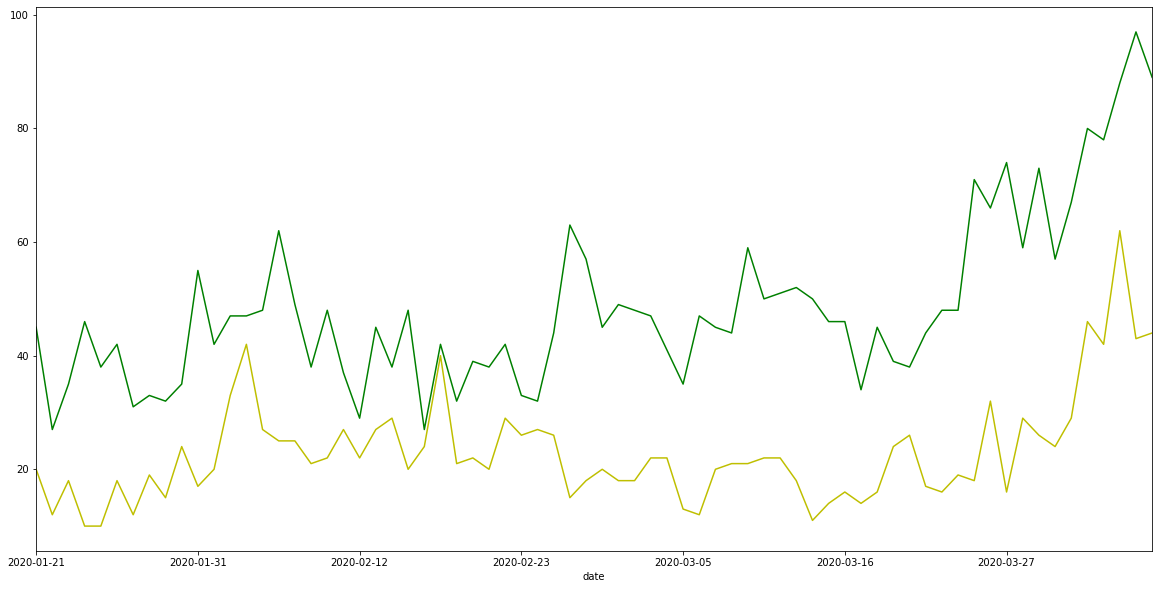

In [530]:
plt.figure(figsize=(20,10))
# textonly[(textonly.polarity >0.5) & (textonly.subjectivity >0.5)].groupby('date').polarity.count().plot(kind = "line", color='r', label = '>0.9')
# textonly[(textonly.polarity <-0.5) & (textonly.subjectivity >0.5)].groupby('date').polarity.count().plot(kind = "line", color='b', label = '>0.8')

# plt.figure(figsize=(20,10))
textonly[(textonly.polarity >0.7)].groupby('date').polarity.count().plot(kind = "line", color='y', label = '>0.9')
textonly[(textonly.polarity <-0.5)].groupby('date').polarity.count().plot(kind = "line", color='g', label = '>0.8')


In [ ]:

abc = textonly.screen_name.tolist()
len(abc)


In [151]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import re
from geopy.geocoders import Nominatim
geolocator = Nominatim()
from geopy.exc import GeocoderTimedOut
URL_INIT = 'https://twitter.com/'

list_of_users1=abc[:10000] 

#The located userlocations are appended to this list
list_of_found_userlocations = []

#The not located userlocations are appended to this list. 
#Maybe they contain some typo or something else like that. 
list_of_nonfound_userlocations = []

def parse_url(tweet_user):
    url = URL_INIT+ tweet_user.strip('@')
    return url

for user in list_of_users1:
    try:
        url = parse_url(user)
        response = urlopen(url)
    except:
        continue
    html = response.read()
    soup = BeautifulSoup(html)
    location = False
    a = soup.find('a', {"data-place-id": True})
    if a: # Does the location info exist?
        location = a.string
    if location:
        if ',' in location:
            splitted_location = location.split(',')
        else:
            splitted_location = re.split('|;|-|/|°|#', location)
        try:
            if splitted_location:
                located_location = geolocator.geocode(splitted_location[0], timeout=100)
            else:
                located_location = geolocator.geocode(location, timeout=100)
            if located_location:
                user_plus_location = (user, located_location)
                list_of_found_userlocations.append(user_plus_location)
            else:
                user_plus_incorrect_location = (user, location)
                list_of_nonfound_userlocations.append(user_plus_incorrect_location)
        except GeocoderTimedOut as e:
            print("Error: geocode failed on input %s with message %s"%(location, e))

/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: Using Nominatim with the default "geopy/1.21.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  """


In [158]:
list_of_found_userlocations

[('nomosnowguy',
  Location(Michigan, United States of America, (43.6211955, -84.6824346, 0.0))),
 ('nomosnowguy',
  Location(Michigan, United States of America, (43.6211955, -84.6824346, 0.0))),
 ('NYTrink',
  Location(Illinois, United States of America, (40.0796606, -89.4337288, 0.0))),
 ('CalciteAsh',
  Location(Sparwood, Regional District of East Kootenay, British Columbia, Canada, (49.7332695, -114.8858477, 0.0))),
 ('IiiTenuta',
  Location(East Peoria, Tazewell County, Illinois, 61611, United States of America, (40.666149, -89.5800978, 0.0))),
 ('pep4959',
  Location(Vieques, Puerto Rico, 00765, United States of America, (18.1215622, -65.45746403129988, 0.0))),
 ('TimJone30059557',
  Location(Mississippi, United States of America, (32.9715645, -89.7348497, 0.0))),
 ('CarolinaGirlDJT',
  Location(University of North Carolina, Old Fraternity Row, Baby Hollow, Chapel Hill, Orange County, North Carolina, 27599-3175, United States of America, (35.90503535, -79.04775326525107, 0.0))),


In [241]:
user = list_of_found_userlocations + list_of_found_userlocations2 +list_of_found_userlocations3
user_df = pd.DataFrame(user, columns = ['screen_name', 'location'])
user_df.to_csv('user_df.csv')

In [250]:
states_df = pd.read_csv('states.csv', encoding='utf-8')
states = states_df.state.tolist()
abbrevs = states_df.abbrev.tolist()
states_and_abbrev = states + abbrevs

In [243]:
user_df['text'] = user_df['location'].astype(str)

In [244]:
user_df['text_list'] = user_df['text'].str.split()

In [245]:
user_df2 = user_df[user_df['text'].apply(lambda x: any(item in x for item in states_and_abbrev))]

In [246]:
user_df2.to_csv('user_df2.csv')

In [247]:
pd.read_csv('user_df2.csv', encoding='utf-8')

,Unnamed: 0,screen_name,location,text,text_list
0,0,nomosnowguy,"Michigan, United States of America","Michigan, United States of America","['Michigan,', 'United', 'States', 'of', 'Ameri..."
1,1,nomosnowguy,"Michigan, United States of America","Michigan, United States of America","['Michigan,', 'United', 'States', 'of', 'Ameri..."
2,2,NYTrink,"Illinois, United States of America","Illinois, United States of America","['Illinois,', 'United', 'States', 'of', 'Ameri..."
3,4,IiiTenuta,"East Peoria, Tazewell County, Illinois, 61611,...","East Peoria, Tazewell County, Illinois, 61611,...","['East', 'Peoria,', 'Tazewell', 'County,', 'Il..."
4,6,TimJone30059557,"Mississippi, United States of America","Mississippi, United States of America","['Mississippi,', 'United', 'States', 'of', 'Am..."
...,...,...,...,...,...
8444,11191,sdm1177,"Delaware, United States of America","Delaware, United States of America","['Delaware,', 'United', 'States', 'of', 'Ameri..."
8445,11192,HourOptions,"California, United States of America","California, United States of America","['California,', 'United', 'States', 'of', 'Ame..."
8446,11193,raider2949,"Conyers, Rockdale County, Georgia, 30013-2028,...","Conyers, Rockdale County, Georgia, 30013-2028,...","['Conyers,', 'Rockdale', 'County,', 'Georgia,'..."
8447,11194,PhilFingar,"Montana, United States of America","Montana, United States of America","['Montana,', 'United', 'States', 'of', 'America']"


In [283]:
abc =[]
for row in user_df2.iterrows():
    for state in states:
        while user_df2["text"].str.contains(state):
            user_df2['user_State'] = state

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [413]:
for row in user_df2.iterrows():
    for state in states:
        user_df2.loc[user_df2[user_df2["text"].str.contains('Alabama')]['state'] == state , 'newstate'] = state

KeyError: 'state'

In [271]:
user_df2[user_df2["text"].str.contains('Alabama')].user_state = 'Alabama'

/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [327]:
user_df2['user_state']= 'abc'

/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [330]:
for i in data.state:
    newcase = np.diff(data[data.state == i].cases)
    newcase = np.insert(newcase,0,0)
    data.loc[data['state'] == i , 'newcases'] = newcase

/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/LSP/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [331]:
user_df2[user_df2["text"].str.contains('Alabama')]

,screen_name,location,text,text_list,user_state
86,CareyCooper19,"(Foley, Baldwin County, Alabama, United States...","Foley, Baldwin County, Alabama, United States ...","[Foley,, Baldwin, County,, Alabama,, United, S...",abc
202,dieisaid,"(Alabama, United States of America, (33.258881...","Alabama, United States of America","[Alabama,, United, States, of, America]",abc
645,MadMen_Manson,"(Tuscaloosa, Tuscaloosa County, Alabama, Unite...","Tuscaloosa, Tuscaloosa County, Alabama, United...","[Tuscaloosa,, Tuscaloosa, County,, Alabama,, U...",abc
807,mhhoward_AL,"(Alabama, United States of America, (33.258881...","Alabama, United States of America","[Alabama,, United, States, of, America]",abc
889,Auburngirlx,"(Alabama, United States of America, (33.258881...","Alabama, United States of America","[Alabama,, United, States, of, America]",abc
...,...,...,...,...,...
9816,robin_ayers,"(Daphne, Baldwin County, Alabama, United State...","Daphne, Baldwin County, Alabama, United States...","[Daphne,, Baldwin, County,, Alabama,, United, ...",abc
10371,goof_troupe,"(Huntsville, Madison County, Alabama, United S...","Huntsville, Madison County, Alabama, United St...","[Huntsville,, Madison, County,, Alabama,, Unit...",abc
10590,connect2damon,"(Auburn, Lee County, Alabama, United States of...","Auburn, Lee County, Alabama, United States of ...","[Auburn,, Lee, County,, Alabama,, United, Stat...",abc
11016,bobbieloop,"(Kimberly, Jefferson County, Alabama, United S...","Kimberly, Jefferson County, Alabama, United St...","[Kimberly,, Jefferson, County,, Alabama,, Unit...",abc


In [304]:
user_df2[user_df2["text"].str.contains('Alabama')].screen_name

86         CareyCooper19
202             dieisaid
645        MadMen_Manson
807          mhhoward_AL
889          Auburngirlx
              ...       
9816         robin_ayers
10371        goof_troupe
10590      connect2damon
11016         bobbieloop
11027    SteveBr90278566
Name: screen_name, Length: 83, dtype: object

In [321]:
user_df2

,screen_name,location,text,text_list,user_state
0,nomosnowguy,"(Michigan, United States of America, (43.62119...","Michigan, United States of America","[Michigan,, United, States, of, America]",A
1,nomosnowguy,"(Michigan, United States of America, (43.62119...","Michigan, United States of America","[Michigan,, United, States, of, America]",A
2,NYTrink,"(Illinois, United States of America, (40.07966...","Illinois, United States of America","[Illinois,, United, States, of, America]",A
4,IiiTenuta,"(East Peoria, Tazewell County, Illinois, 61611...","East Peoria, Tazewell County, Illinois, 61611,...","[East, Peoria,, Tazewell, County,, Illinois,, ...",A
6,TimJone30059557,"(Mississippi, United States of America, (32.97...","Mississippi, United States of America","[Mississippi,, United, States, of, America]",A
...,...,...,...,...,...
11191,sdm1177,"(Delaware, United States of America, (38.69204...","Delaware, United States of America","[Delaware,, United, States, of, America]",A
11192,HourOptions,"(California, United States of America, (36.701...","California, United States of America","[California,, United, States, of, America]",A
11193,raider2949,"(Conyers, Rockdale County, Georgia, 30013-2028...","Conyers, Rockdale County, Georgia, 30013-2028,...","[Conyers,, Rockdale, County,, Georgia,, 30013-...",A
11194,PhilFingar,"(Montana, United States of America, (47.375267...","Montana, United States of America","[Montana,, United, States, of, America]",A


In [252]:
r.params

Intercept                                              0.024361
retail_and_recreation_percent_change_from_baseline     1.894433
grocery_and_pharmacy_percent_change_from_baseline     -4.056064
parks_percent_change_from_baseline                    -0.622722
transit_stations_percent_change_from_baseline         -2.207855
workplaces_percent_change_from_baseline               -8.849353
residential_percent_change_from_baseline             -15.323339
SupportRate                                            0.901359
dtype: float64